In [148]:
import pandas as pd
import numpy as np 
import matplotlib as plt
%matplotlib inline


In [149]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [150]:
df.shape

(891, 12)

In [151]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Initial Analysis and Cleaning**

In [152]:
df.describe()

#on average, 38% survived 
#the mean age is 30 years 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [154]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
df.duplicated().sum()

0

In [156]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [157]:
#taking care of null-values 

#cabin mostly has nulls (687 out of 891) , so I decided to drop this feature entirely 
df = df.drop(['Cabin'], axis=1)

#ticket is mostly unique, so it won't be a good attribute for prediction 
#name is also unique, so it won't be needed for analysis and prediction 
#Fare is meaningless. People payed different prices for different passenger classes, there is no consistency
df = df.drop(['Ticket', 'Name', 'Fare'], axis=1)

In [158]:
#I think age and cabin is important to keep, even though they have missing values
#So I decided to remove the rows that have null values 
df = df.dropna()

In [159]:
df.shape

(712, 8)

In [160]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000


**Data Visualizations**

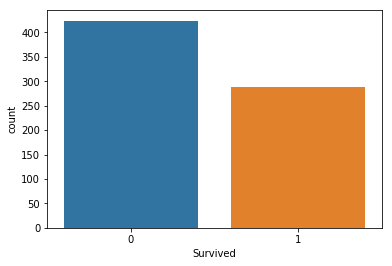

In [161]:
import seaborn as sns
sns.countplot(x = 'Survived', data = df) #more people died than survived

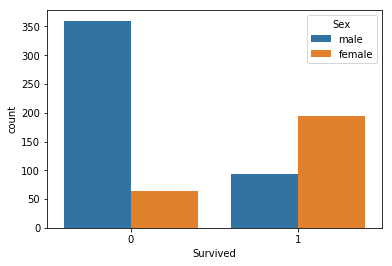

In [162]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df) #more females survived than males 

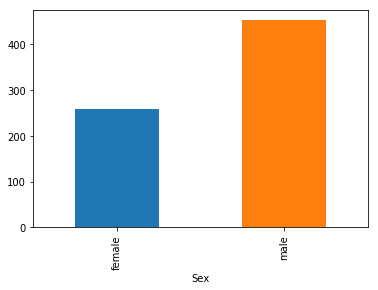

In [163]:
df.groupby('Sex')['Sex'].count().plot.bar() #there were more males on the ship 

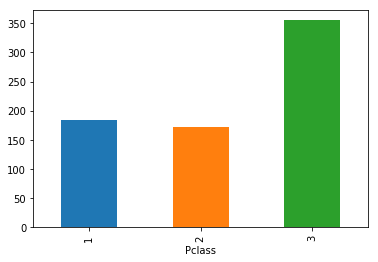

In [164]:
df.groupby('Pclass')['Pclass'].count().plot.bar() #the most people were in the 3rd class

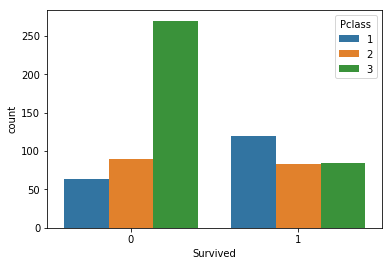

In [165]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df) #third Pclass had much lower rate of survival 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


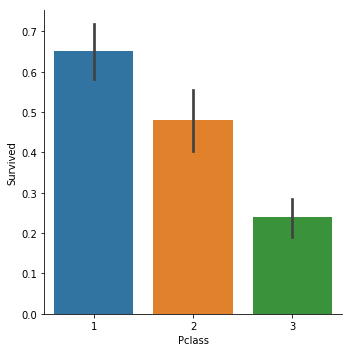

In [166]:
sns.catplot('Pclass','Survived', kind = 'bar', data = df) #survival decreases with Pclass

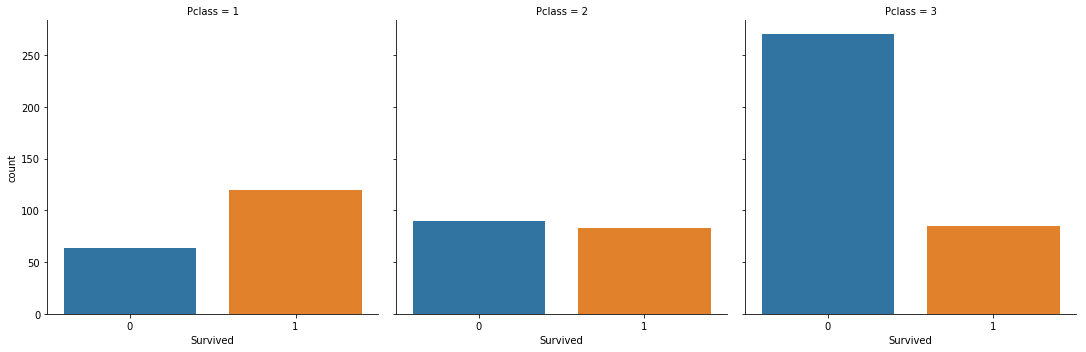

In [167]:
sns.catplot(x = 'Survived', col = 'Pclass', kind = 'count', data = df) #more detail 

In [168]:
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

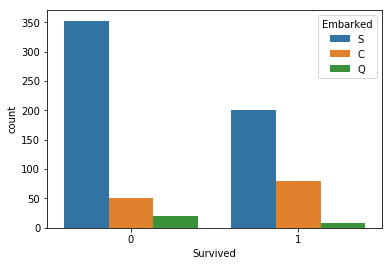

In [169]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = df)  #there is no much correlation between survival and where you embark

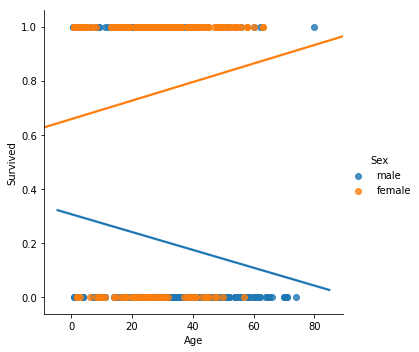

In [170]:
sns.lmplot('Age', 'Survived', data = df, ci = None, hue='Sex') #woman are more likely to survive. the older woman is, 
#the higher chance of survival 
#opposite for men 

In [171]:
df.groupby('SibSp')['SibSp'].count()  #most people traveled without siblings or spouces, or with one

SibSp
0    469
1    183
2     25
3     12
4     18
5      5
Name: SibSp, dtype: int64

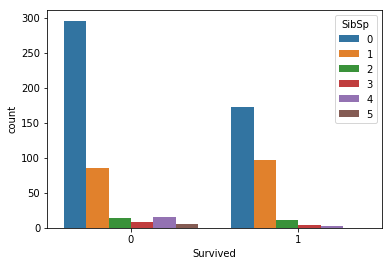

In [172]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = df) 
#people with 0 siblings/spouces were less likely to survive 
#the number of siblings/spouces did not really affect survival 

In [173]:
df.groupby('Parch')['Parch'].count() #most people traveled without children/parents

Parch
0    519
1    110
2     68
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

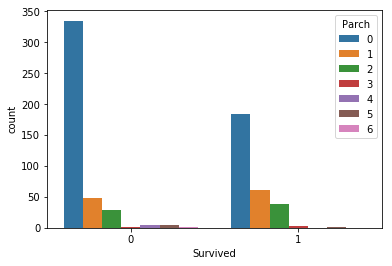

In [174]:
sns.countplot(x = 'Survived', hue = 'Parch', data = df) 
#similar outcomes as to number of siblings 

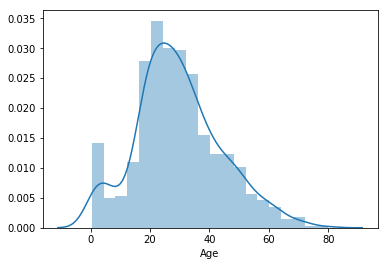

In [175]:
sns.distplot(df['Age']) #most people traveling were in their 20s 

In [ ]:
#i want to check if kids were more likely to survive than adulta


In [176]:
df["Child"] = 0
df["Child"][df["Age"] <= 18] = 1




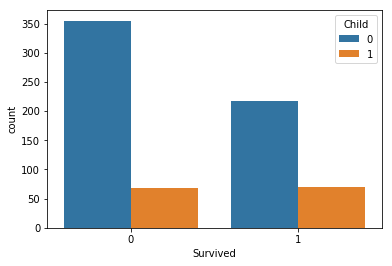

In [177]:
sns.countplot(x = 'Survived', hue = 'Child', data = df) #children were not more likely to survive 

**Prediction Model using KKN**

I decided to use KNN, because I have studied this model before in INFO371 and I think it will be a good fit for this data. 

In [178]:
#Based on my visualizations and analysis, some of the features were not really helpful in determining survival. 
#For my prediction model I will use following features: Sex, Pclass and Child. 

pd.set_option('mode.chained_assignment', None)
df.Sex[df.Sex == 'male'] = 1
df.Sex[df.Sex == 'female'] = 0

#thought of using it, but doesn't improve accuracy 
#df.Embarked[df.Embarked == 'S'] = 1
#df.Embarked[df.Embarked == 'C'] = 2
#df.Embarked[df.Embarked == 'Q'] = 3
df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Child
0,1,0,3,1,22.0,1,0,S,0
1,2,1,1,0,38.0,1,0,C,0
2,3,1,3,0,26.0,0,0,S,0
3,4,1,1,0,35.0,1,0,S,0
4,5,0,3,1,35.0,0,0,S,0


In [179]:
train_df =  df.filter(['Survived', 'Pclass','Sex', 'Child'], axis=1)
train_df.head()


,Survived,Pclass,Sex,Child
0,0,3,1,0
1,1,1,0,0
2,1,3,0,0
3,1,1,0,0
4,0,3,1,0


In [180]:
X = train_df.filter(['Pclass','Sex','Child'], axis=1)
y = train_df.filter(['Survived'])


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [182]:
#perform KNN on the split training set to check accuracy before submitting 
train_data,test_data,train_labels,test_labels = train_test_split(X, y, test_size=0.25, random_state=42) 

In [183]:
clf=KNeighborsClassifier()
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [184]:
predictions=clf.predict(test_data)

In [185]:
print(accuracy_score(test_labels,predictions)) #check accuracy 

0.7696629213483146


In [186]:
#And now, make the predictions for the test_data 

df_test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [187]:
df_test.shape

(418, 11)

In [188]:

test_data = df_test.filter(['Pclass','Sex','Age'], axis=1) #grab features for future prediction 
test_data.head()



,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [189]:
#I was not sure, if I can just remove null values for age in the test set, so I decided to 
#fill them with with median age and then create a "Child" column

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

test_data.Age.isnull().sum()

#test_data = test_data.drop(['Age'], axis=1)

0

In [190]:
test_data["Child"] = 0
test_data["Child"][test_data["Age"] <= 18] = 1

test_data = test_data.drop(['Age'], axis=1)

In [191]:
test_data["Sex"][test_data["Sex"] == "male"] = 1
test_data["Sex"][test_data["Sex"] == "female"] = 0


In [192]:
test_data.head()

,Pclass,Sex,Child
0,3,1,0
1,3,0,0
2,2,1,0
3,3,1,0
4,3,0,0


In [193]:
clf=KNeighborsClassifier()
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [195]:
result=clf.predict(test_data)

In [199]:
df_test['Survived'] = pd.Series(result, index=df_test.index) #append the result of prediction

In [200]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [201]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)

In [209]:

final_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [210]:
final_df.to_csv("predictions.csv", header = True, index = False)